In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn contractions kagglehub



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import importlib
import pipeline
importlib.reload(pipeline) 
from pipeline import load_kaggle, clean_dataset, train_logreg, train_svm, train_nb, eval_on_dataset

/Users/stevenwu/Desktop/24-25 Spring Semester/CSCI3383/RealFakeNewsDetector/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read Data

In [3]:
# Load dataset using pipeline function
df = load_kaggle()
print(f"Dataset shape: {df.shape}")

Dataset shape: (44898, 5)


/var/folders/cm/r73hsgws6m7blq0qr92p7sg40000gn/T/ipykernel_52568/4190091810.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["False", "True"])


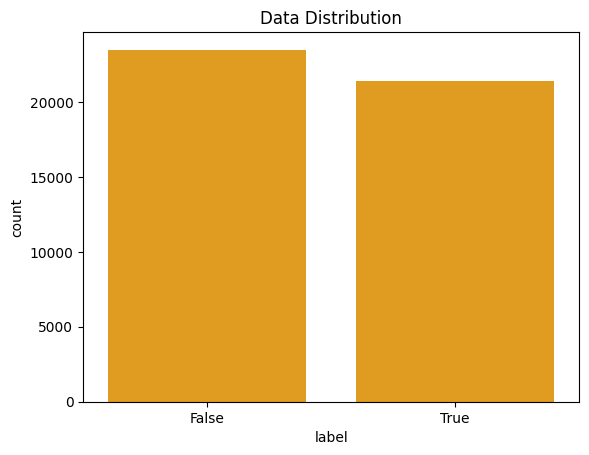

In [4]:
ax = sns.countplot(data=df, x="label", color="orange")
ax.set_xticklabels(["False", "True"])
plt.title("Data Distribution")
plt.show()

## Data Exploration

In [5]:
fake_df = pd.read_csv("datasets/kaggle/kaggle_fake.csv")
fake_df.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_df = pd.read_csv("datasets/kaggle/kaggle_real.csv")
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Data Preprocessing

In [8]:
df = clean_dataset(df)

df.head()

,title,text,subject,date,label
0,wow hillarys got governor of iowa shakin in hi...,wowhillary s got the governor of iowa shaking ...,politics,"Feb 1, 2016",0
1,belgian trial of paris attack suspect postpone...,brussels reuters the belgian trial of a key su...,worldnews,"December 18, 2017",1
2,white house lawyer cobb predicts quick end to ...,washington reuters white house special counsel...,politicsNews,"August 18, 2017",1
3,teachers union protest gets ugly as protesters...,in case you don t live in the midwest you migh...,politics,"Jan 20, 2016",0
4,senior yous official releases damaging informa...,this is very curious the ap is reporting a sto...,politics,"Apr 10, 2017",0


In [9]:
df.shape

(38644, 5)

In [10]:
df["combined"] = (
    df["title"].fillna("") 
    + " [TITLE] " 
    + df["text"].fillna("")
)

## Baseline Logistic Regression Model

In [11]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df["combined"], df["label"],
    test_size=0.1,
    random_state=42,
    stratify=df["label"],
)

In [12]:
# Train model using pipeline function
model, vectorizer = train_logreg(X_train, y_train)

# Evaluate model using pipeline function
accuracy, report = eval_on_dataset(model, vectorizer, X_test, y_test)

print("=== LR Results ===")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, model.predict(vectorizer.transform(X_test))))

# Save models to joblist/ folder (as per README)
joblib.dump(model, "joblist/logreg_model.pkl")
joblib.dump(vectorizer, "joblist/logreg_vectorizer_kaggle.pkl")
print("\nModels saved to joblist/ folder")

=== LR Results ===
Accuracy: 0.9901681759379043

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1746
           1       0.99      0.99      0.99      2119

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865


Models saved to joblist/ folder


## Support Vector Machine (SVM) Model

In [13]:
# Train SVM model using pipeline function
svm_model, svm_vectorizer = train_svm(X_train, y_train)

# Evaluate SVM model using pipeline function
svm_accuracy, svm_report = eval_on_dataset(svm_model, svm_vectorizer, X_test, y_test)

print("=== SVM Results ===")
print("Accuracy:", svm_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, svm_model.predict(svm_vectorizer.transform(X_test))))

# Save models to joblist/ folder (as per README)
joblib.dump(svm_model, "joblist/svm_model.pkl")
joblib.dump(svm_vectorizer, "joblist/svm_vectorizer_kaggle.pkl")
print("\nSVM models saved to joblist/ folder")


=== SVM Results ===
Accuracy: 0.9948253557567918

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1746
           1       0.99      1.00      1.00      2119

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865


SVM models saved to joblist/ folder


## Naive-Bayes

In [13]:
# Train NB model using pipeline function
nb_model, nb_vectorizer = train_nb(X_train, y_train)

# Evaluate NB model using pipeline function
nb_accuracy, nb_report = eval_on_dataset(nb_model, nb_vectorizer, X_test, y_test)

print("=== Naive Bayes Results ===")
print("Accuracy:", nb_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, nb_model.predict(nb_vectorizer.transform(X_test))))

# Save models to joblist/ folder (as per README)
joblib.dump(nb_model, "joblist/nb_model.pkl")
joblib.dump(nb_vectorizer, "joblist/nb_vectorizer_kaggle.pkl")
print("\nNB models saved to joblist/ folder")

=== Naive Bayes Results ===
Accuracy: 0.9509043927648578

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       180
           1       0.94      0.97      0.95       207

    accuracy                           0.95       387
   macro avg       0.95      0.95      0.95       387
weighted avg       0.95      0.95      0.95       387


NB models saved to joblist/ folder


In [15]:
# Compare models
print("=== Model Comparison ===")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"\nSVM improvement from LR: {svm_accuracy - accuracy:.4f} ({((svm_accuracy - accuracy) / accuracy * 100):.2f}%)")
print(f"NB improvement from LR: {nb_accuracy - accuracy:.4f} ({((nb_accuracy - accuracy) / accuracy * 100):.2f}%)")



=== Model Comparison ===
Logistic Regression Accuracy: 0.9819
SVM Accuracy: 0.9897
Naive Bayes Accuracy: 0.9509

SVM improvement from LR: 0.0078 (0.79%)
NB improvement from LR: -0.0310 (-3.16%)
